# Project 1:  Projectile motion with drag <a class="tocSkip">

Based on [Physics Simulations in Python](<u>https://physics.weber.edu/schroeder/scicomp/PythonManual.pdf</u>) by Daniel V. Schroeder (Weber State University, [dschroeder@weber.edu](dschroeder@weber.edu)).  Adapted with permission by [Ruth Van de Water](rsvandewater@noctrl.edu) April, 2019. Last updated June 21, 2022.
    
_Welcome to the world of computational physics!_     
    
The idea of a *simulation* is to program the laws of physics into the computer, and then let the computer calculate what happens as a function of time, step by step into the future.  In part 1 of this project, you will simulate the two-dimensional motion of a point-like, massive object under the influence of gravity, so those laws will be Newton's laws of motion. As you know, this problem can be solved analytically (_i.e._, with pencil and paper) when only gravity is present. With a computer, however, you can simulate the motion of a classical object subject to *any* forces and starting with *any* initial conditions -- even when no explicit formula for the motion exists. In part 2 of this project, you will add a drag force and observe how it changes the object's trajectory.
        
<div class="alert alert-block alert-info">
<font size="+2"><b><i>Learning objectives:</i></b></font>
    
After completing this activity, you will be able to: 
       
- use the forces on an object and Newton's Second Law to simulate the object's motion on a computer,
    
- plot the object's trajectory in two dimensions,  
    
- validate numerical simulation code by (i) comparing with known analytic results and/or (ii) looking for convergence of the numerical results,and
    
- quantify the numerical discretization errors in your results.
    
You will also be able to
    
- write and use Python functions, 
    
- display and format output using `print()`, and
    
- graph functions and data using Matplotlib,       
    
- document your results in a Jupyter notebook.
    
</div>

_... but first some preliminaries._

# Jupyter notebooks

Because this is the first time that many of you are programming in a [<u>Jupyter Notebook</u>](https://jupyter.org/), below is a brief overview of the application's most important features along with hyperlinks to the official documentation.  (*There are, of course, numerous excellent tutorials and other references for Jupyter Notebook available online that can be found with a simple Google search.*)

The Jupyter Notebook web application enables users to "captur[e] the whole computation process: developing, documenting, and executing code, as well as communicating the results" within a single file (the [<u>**_notebook_**</u>](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html?highlight=markdown#)) that can be shared with ease.  From the linked documentation:

> "Notebooks may be exported to a range of static formats, including HTML (for example, for blog posts), reStructuredText, LaTeX, PDF, and slide shows, via the nbconvert command.

> Furthermore, any ``.ipynb`` notebook document available from a public URL can be shared via the Jupyter Notebook Viewer <nbviewer>. This service loads the notebook document from the URL and renders it as a static web page. The results may thus be shared with a colleague, or as a public blog post, without other users needing to install the Jupyter notebook themselves."

By default, Jupyter Notebook employs the iPython kernel, which runs <a href="https://docs.python.org/3/"><b><u>Python</u></b></a> code. 

## Code cells

A notebook is a collection of executable **_cells_**, or fields for text input.  [<u>**_Code cells_**</u>](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html?highlight=markdown#code-cells) allow users to write and edit code with syntax highlighting and tab completion:   
   
> "When a code cell is executed, code that it contains is sent to the <a href="https://ipython.org/ipython-doc/3/development/kernels.html"><b><i><u>kernel</u></i></b></a> associated with the notebook. The results that are returned from this computation are then displayed in the notebook as the cell’s output. The output is not limited to text, with many other possible forms of output are also possible, including matplotlib figures and HTML tables (as used, for example, in the pandas data analysis package)."
</blockquote> 

"Every cell [in a Jupyter notebook] starts off being a code cell, but its type can be changed by using a drop-down on the toolbar (which will be “Code”, initially), or via keyboard shortcuts."  

## Markdown cells

[<u>**_Markdown Cells_**</u>](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html?highlight=markdown#markdown-cells) (<i>like this one!</i>) allow users to interspere their code with explanatory text and equations, tables and images, and references. 
By marking up the text, users can speficy which parts of the text should be italicized or bold, bulleted lists, section or subsection headers, and so forth.  "When a Markdown cell is executed, the Markdown code is converted into the corresponding formatted rich text."  

Within Jupyter markdown cells you can display and format mathematical expressions using standard [<u>**_LaTeX notation_**</u>](https://en.wikibooks.org/wiki/LaTeX/Mathematics).  You can also format text with [<u>**_HTML_**</u>](https://www.w3schools.com/TAGS/default.ASP).

## Workflow

Each cell in a Jupyter notebook can be run individually by clicking the “Play” button the toolbar or typing Shift-Enter.  This is extremely convienent for writing and debugging code, as well as for interactive exploration such studying the behavior of a system as various parameters are changed.  One can also clear all definitions from memory and execute the notebook's cells sequentially by selecting the menu item _"Kernel" $\longrightarrow$ "Restart & Run All."_ This should be done periodically while coding to check that the program's behavior and cell dependencies are as expected, as well as once the program is complete.  

<div class="alert alert-block alert-success">
    <center><b>Strategy:</b> When programming within Jupyter Notebook, <i>"break up the computational problem in pieces,<br> organizing related ideas into cells and moving forward once previous parts work correctly."</i></center>
</div>  

# Modules and other preliminaries

Python enables users to "put definitions in a file and use them in a script or in an interactive instance of the interpreter. Such a file is called a [<u>**_module_**</u>](https://docs.python.org/3/tutorial/modules.html#); definitions from a module can be imported into other modules or into the main module (the collection of variables that you have access to in a script executed at the top level and in calculator mode)." Python module files end with the ``.py`` suffix.

- Before you can employ definitions from a module in your program, you must [<u>**_import_**</u>](https://docs.python.org/3/reference/import.html) them via the command ``import module_name``, where the module's name is the name of the file without the ``.py`` suffix.  You can then refer to any definition from that module as ``module_name.definition_name``.

- You can also import only the specific definition that you need via the command ``from module_name import definition_name``.  With this approach, the definition lives in your program's name space, so simply you refer to it by ``definition_name``. 

- If you will need several definitions from a single module, it is often simpler to import everything in the module via the command ``from module_name import *``.  _You should be careful with this approach, however, because this can result in multiple definitions with the same name._

For example, to calculate the cosine of $\pi/4$ in Python, I would first import the number $\pi$ from the [<u>**math**</u>](https://docs.python.org/3/library/math.html) module and then import the sine function from the [<u>**NumPy**</u>](numpy.org/doc/stable/user/whatisnumpy.html) module.


In [1]:
from math import pi
from numpy import cos
cos(pi/4)

0.7071067811865476

Python has an extensive [<u>**_Standard Library_**</u>](https://docs.python.org/3/library/) of built-in modules"that provide access to system functionality such as file I/O that would otherwise be inaccessible to Python programmers, as well as modules written in Python that provide standardized solutions for many problems that occur in everyday programming."  In addition, numerous open-source modules and [<u>**_packages_**</u>](https://packaging.python.org/tutorials/packaging-projects/) (a collection of related modules) have been developed to support a wide range of subject areas and computing needs.  Two of the most commonly used packages in scientific computing are [<u>NumPy</u>](numpy.org/doc/stable/user/whatisnumpy.html):

<blockquote>"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more."</blockquote>

and [<u>SciPy</u>](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html):

<blockquote>"SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data."</blockquote>

# The Matplotlib plotting library

Throughout our computational projects, we will create numerous plots to help us visualize and interpret our simulation results.  We will make these plots using [<u>**Matplotlib**</u>](https://matplotlib.org/), "a comprehensive library for creating static, animated, and interactive visualizations in Python." Matplotlib is employed by countless professional scientists and engineers worldwide to create publication-quality plots and other visualizations.  

The official [<u>Matplotlib documentation</u>](https://matplotlib.org/stable/contents.html) provides many very helpful [<u>examples</u>](https://matplotlib.org/stable/gallery/index.html) (_with Python code_) for a variety of plot styles including bar graphs, pie charts, and [<u>scatter plots</u>](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) (_what we need here_). You can also, of course, find countless additional Matplotlib examples via a simple Google search.

Simple plots --- _such as those that we will produce in our computational projects this semester_ --- can be made easily with the [<u>**pyplot interface**</u>](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) to Matplotlib. From the documentation, 

<blockquote>
"[The] matplotlib.pyplot [module] is a collection of functions [each of which] makes some change to a figure: <i>e.g.</i>, creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc."
</blockquote>

<div class="alert alert-block alert-success"><center>Using Matplotlib to plot data is easy <b><i>if</i></b> you know the appropriate functions and syntax for using them.  <br> Therefore, <b><i>before</i></b> you make your first Matplotlib graph, I <b><i>strongly encourage</i> you to familiarize yourself with the basic pyplot commands <br> and formatting options</b> by going through this introductory <a href="https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py"><b><u>Pyplot tutorial</u></b>, which succinctly covers the essentials. </center></div> 

Once you have the Matplotlib basics down, these [<b><u>official Matplotlib handouts</u></b>](https://github.com/matplotlib/cheatsheets#handouts) may also be useful.

![Matplotlib for Beginners](https://camo.githubusercontent.com/b1b8838502a81077591ccadbf45dc45f2207637b41245e557198b680b0a2e662/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f68616e646f75742d626567696e6e65722e706e67)


![Matplotlib for Intermediate Users](https://camo.githubusercontent.com/fc055a0d3897e7aec7ec66fc1d7f70cfb2873f82eb5be4ea977286a1cf08fa74/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f68616e646f75742d696e7465726d6564696174652e706e67)

## A Matplotlib example

The code below uses the ``matplotlib.pyplot`` module to create an x-y scatter plot with a title, axis labels, and legend.  Matplotlib accepts data in the form of [<u>**Python lists**</u>](https://docs.python.org/3/tutorial/introduction.html#lists) or [<u>**NumPy arrays**</u>](https://numpy.org/doc/stable/reference/generated/numpy.array.html) --- one containing the "x" values and another containing the "y" values.  (In fact, Matplotlib _always_ converts lists to NumPy arrays internally.)

Note that both ``matplotlib.pyplot`` and ``numpy`` must be imported at the top of the code because they are not part of the Python Standard Library.

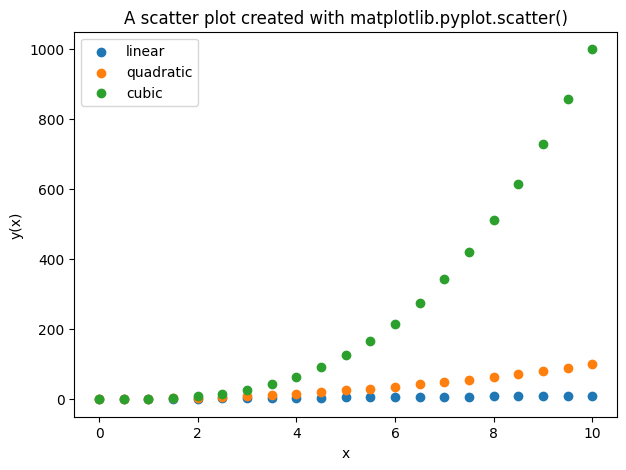

<Figure size 700x500 with 0 Axes>

In [10]:
# (1) Import matplotlib so that we can make plots.  :)  
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = [7,5]

# (2) This example stores our x and y data points in numpy arrays.  
#     You can also put your x and y data points in a python list object.
import numpy as np

# (3) Create an array or list of x values
dx = 0.5
xmax = 10
x = np.arange(0, xmax+dx, dx) #array from 0 to xmax in steps dx

# (4) Create an array or list of y values
#     In this example, we will plot the functions y=x, y=x^2, and y=x^3
y1 = x     
y2 = x**2
y3 = x**3

# (5) Make a Matplotlib scatter plot
plt.scatter(x, x, label='linear')  #the first argument of plt.scatter is the list/array of x values
plt.scatter(x, x**2, label='quadratic') #The second argument of plt.scatter is the list/array of y values
plt.scatter(x, x**3, label='cubic') #You can optionally give each data set its own 'label', which is shown in the legend

plt.title("A scatter plot created with matplotlib.pyplot.scatter()") #title
plt.xlabel('x') #x-axis label
plt.ylabel('y(x)')  #y-axis label
plt.legend() #the legend won't show up without this

# (6) Show the plot in the display window.
#     You can also save your matplotlib plot to a file before doing so if you wish to use it later.
#     Clear the plot from memory so that your next plot has a clean slate.
plt.show()
plt.clf()

# Simulating motion under the influence of forces

Consider an object located at position $\vec{r}_0$ moving with velocity $\vec{v}$.  Suppose that we wish to find its new position  after a short time interval $\Delta t$.  If the time interval $\Delta t$ is sufficiently small, we can approximate the instantaneous velocity by the average velocity, _i.e._ $\vec{v} \approx \vec{v}_{avg.}$.  We can then employ the relationship between average velocity and displacement: 

\begin{equation}
\vec{v}_{avg.} = {\Delta \vec{r} \over \Delta t} = {\vec{r}_1 - \vec{r}_0 \over \Delta t}.
\end{equation}

Rearrangement of this relationship and replacing $\vec{v}_{avg.}$ with $\vec{v}$ yields the *position-update equation*:

\begin{equation}
\vec{r}_1 = \vec{r}_0 + \vec{v} \Delta t.
\end{equation}                            

In words, if we know an object’s starting position and velocity, we can use this equaton to find its position a time $\Delta t$ later.  

Suppose that we now want to find the next position along the object’s path, $\vec{r}_2$.  We can simply employ the position-update equation again, this time using $\vec{r}_1$ as the starting position: $\vec{r}_2 = \vec{r}_1 + \vec{v} \Delta t$.

By repeating this process, we can *_iteratively calculate_* the path of the object, provided that we know the object’s velocity at each point along the path.  This series of repetitive calculations -- especially when the number of iterations required is large -- is best performed on a computer.

What if, however, the object’s velocity is changing due to the application of a force?  Then we must first update the velocity using Newton’s Second Law before we update the position.  
The main ideas involved are the following:

- Forces cause an object to accelerate.  When an object experiences a net force, its velocity changes according to Newton’s Second Law:

\begin{equation}
\vec{F}_{net} = m\vec{a} = m{d\vec{v} \over dt}.
\end{equation}

- An object’s momentum is related to its velocity by

\begin{equation}
\vec{p} = m\vec{v},
\end{equation}

so Newton’s Second Law can also be expressed as

\begin{equation}
\vec{F}_{net} = {d\vec{p} \over dt} .
\end{equation}

- For small time intervals ($\Delta t$), we can make the approximation

\begin{equation}
\vec{F}_{net} \approx {\Delta\vec{p} \over \Delta t},
\end{equation}

and then rearrange the approximate Second-Law equation to obtain the *momentum-update equation*: 

\begin{equation}
\vec{p}_f = \vec{p}_i + \vec{F}_{net} \Delta t.
\end{equation} 

In a computer simulation, the idea is to start with the state of the particle at $t=0$, use the above equations to calculate $\vec{r}$ and $\vec{v}$ at $t = \Delta t$, then repeat the calculation for the next time interval, and the next, and so on. (_Fortunately, computers don't mind doing repetitive calculations!_) 

The above discussion assumes that the net force is constant throughout the object’s motion.  Often, however the the force on an object changes with its position (_e.g._, the spring force) or velocity (_e.g._, the drag force).  Changing forces can be accounted for by updating the net force at each step using the new position and velocity before applying the momentum-update equation.  The general series of steps for predicting an object’s motion from Newton's Second Law is called an *_algorithm_*.  Therefore, to predict an object’s path over a long time interval given a known set of forces, we can use the algorithm below.

It is important to remember that both the position-update and momentum-update equations are _approximations_, and become more accurate as the time interval $\Delta t$ becomes smaller, such that the average velocity becomes closer to the instantaneous velocity.  By choosing a small time interval in your computer program, not only will you make the positions and momenta calculated from the update equations more exact, but you will also find the object’s location at each step along its path, which you can use to plot the motion.  

<div class="alert alert-block alert-info">
<font size="+2"><b><i>Simulation algorithm for a classical object moving under the influence of forces</i></b></font>
       
<b>Setup</b>
    
1. Create variables for the simulation parameters such as $g$ and $m$.
2. Specify the initial position, $\vec{r}_0$, and momentum of the object, $\vec{p}_0$ . 
3. Specify the starting time of the simulation, $t_0$.
4. Specify a time step $\Delta t$ for your simulation; use a value that is small enough that the object doesn’t move very far during one update. 
    
<b>Simulation</b>
    
Construct a loop that steps through the simulation time in increments of $\Delta t$.  In this loop:
    
5. Calculate $\vec{F}_{net}$ acting on the system for the current values of $\vec{r}$ and $\vec{p}$.
6. Update the object’s momentum: $\vec{p}_f = \vec{p}_i + \vec{F}_{net} \Delta t$,       
7. Update the object’s velocity: $\vec{v} = \vec{p}/m$.            
8. Update the object’s position: $\vec{r}_f = \vec{r}_i + \vec{v} \Delta t$.            
9. (If needed) update the net force: $\vec{F}_{net} = \vec{F}_{net}(\vec{r},\vec{v})$      
10. Increase the simulation time by $\Delta t$.
</div>

## Part 1: Motion under the influence of a constant net force
In this first activity you will simulate the motion of a projectile launched across level ground with an initial speed  and initial angle  (see the figure) under only the influence of gravity — which is constant near the surface of the Earth.  You will modify the provided code to print the starting values, simulation parameters, and range and time-of-flight.  You will also validate your code by comparing the simulation range and time-of-flight with those from the analytic expressions derived from the kinematics equations in 2D.  

### Getting started

_Before running the code cell below_, spend 5 or 10 minutes going through the code with your partner(s) making sure that you understand what it does.  

**Stop to think:** _What parts of the code are specific for projectile motion, and what parts would remain the same for simulating the motion of any classical point particle?_

In [3]:
#Constants
g = 9.80665 #m/^2, CODATA 2018 value (https://physics.nist.gov/cgi-bin/cuu/Value?gn)
dt= 0.1 #step size in seconds
m = 10  #kg

#Initial position
y0 = 0  #m
x0 = 0  #m
t0 = 0  #s
r0 = np.array([x0,y0,0]) #Store initial-position vector as 3-element numpy arrays 

#Initial velocity
speed = 20 #m/s
theta_deg = 45.0 #degrees
theta = pi*theta_deg/180 #convert to radians
vx = speed*np.cos(theta)
vy = speed*np.sin(theta)
v0 = np.array([vx,vy,0]) #Store initial-velocity vector as 3-element numpy arrays 

# ==> Calculate the initial momentum and net force 
p0 = m*v0
Fnet = np.array([0, -m*g, 0]) #only gravity present

# ==> Initiate the loop variables here <==
t = t0
r = r0
p = p0

# ==> Simulate the ball's motion by creating a while loop that stops when the ball hits the ground
while (r[1] >= 0):
    p = p + Fnet*dt             #update the momentum using the net force
    v = p/m                     #calculate the new velocity
    r = r + v*dt                #update the position using the velocity
    t = t+dt                    #increment the simulation time

### Displaying results

$\color{blue}{\mathbf{Program\!:\, }}$ At the end of the program, add code to print out the horizontal distance traveled by the projectile (_i.e._, the range $x_f$) and the time at which the projectile hits the ground (_i.e._, the time-of-flight $t_f$).

<div class="alert alert-block alert-warning">
    <center><span style="color:black">Check in with your instructor before proceeding to the next section.</span></center>
</div>

$\color{blue}{\mathbf{Program\!:\, }}$ Create three empty python `list`s to store the time and the object's x and y positions.  For each iteration of the `while()` loop, append the current values to these lists.  Using this simulation data and `matplotlib.pyplot`, plot 

- the object's horizontal ($x$) position as a function of time,

- the object's vertical ($y$) position as a function of time, and

- the object's vertical position as a function of its horizontal position (this is path that the ball takes, _i.e._, its **_trajectory_**).

_Do the results look like what you would expect?_ If not, inspect your code for errors and fix those that you can identify. Reach out to an instructor if further help is needed.

$\color{magenta}{\mathbf{Play\ around\!:\, }}$ _What parameters in the code determine the initial speed and launch angle?_   Vary these parameters and confirm that the code does what you expect.  

**Stop to think:** _Why is the path of the projectile shown as disconnected dots and instead of a curve?  What parameter in the code determines the spacing between the dots?_  Vary this parameter and again confirm that the code does what you expect.

### Checking result

One important way to check that a numerical simulation code is working correctly is to compare it to known analytic expressions, if such closed-form solutions are available.  As you saw in introductory mechanics, the motion of a projectile in two dimensions under only the influence of gravity is described by a set of kinematics equations.  (For a refresher, see, _e.g._, <a href="https://openstax.org/books/university-physics-volume-1/pages/4-3-projectile-motion"><b><u>OpenStax University Physics</u></b></a>.)   Therefore, in this case, you can indeed validate your simulation by comparing with theoretical expectations.

$\color{blue}{\mathbf{Program\!:\, }}$ In your code (_not on pencil and paper!_), write calculate the range and time of flight predicted by the 2D kinematics equations.  Because you will want to perform these calculations multiple times for different input parameters, it's a good idea to create <b>*functions*</b> to do the job. Have these functions take as arguments the object's mass, initial speed, and launch angle (_aka._ input parameters).  

Print out the results for your simulation parameters. Here's some example code with nice formatting.

```python
    print("Predictions from kinematics equations:")
    print(f"-- range={xf} m\%.")
    print(f"-- landing time t={tf} s")
```


If all of your code is working correctly, the simulation and predicted values should at this point be roughly similar. 

<div class="alert alert-block alert-success">
    <center><i><b>Tip:</b></i> It's good coding practice to <b>keep your personal function definitions together in a location that's easy to find</b>, such as in a dedicated markdown cell near the top of your Jupyter Notebook (<i>or even a separate file, once your code becomes sufficiently long and complex</i>).</center>
</div>

### Estimate the numerical approximation error

As scientists, however, we must replace the qualitative description "roughly similar" with a quantitative assessment of the agreement.

$\color{blue}{\mathbf{Program\!:\, }}$ In your code, write a function to calculate the percentage difference between two values,  

\begin{equation}
\mathrm{\%\ difference} = {x_1 - x_2 \over (x_1 + x2)/2}.
\end{equation}

Use this function to calculate the percentage differences between the predicted values and simulation results for the range and landing time.  Then print out your results. 



$\color{magenta}{\mathbf{Exercise\!:\, }}$ 

Using your simulation code, fill out the table below for a projectile with mass 10 kg, initial speed 20 m/s, and launch angle $45^o$. 

Record your results on the step-size dependence in the table below (*you will probably need to add more rows*).

<center>

| $dt$ (s) | percentage difference in $t_f$ | percentage difference in $x_f$ |
| --- | --- | --- |
| 0.1 | ??? | ??? |
| 0.01 | ??? | ??? |
| $etc.$ |   |   |
    
</center>

_How small does the step size dt in your code have to be to obtain agreement with the analytical results to within 1%?  What about to within 0.1% or 0.01%?_  

<div class="alert alert-block alert-info">
You have now seen that there is an important tradeoff between the accuracy of your simulation and the time that it takes to perform the computation.  In practice, one typically has a target precision that they wish to achieve. One then chooses simulation parameters that are sufficient to obtain the needed the precision goal, but do not unnecessarily waste computer cycles. </div>

<a id='truncation_error'></a>

$\color{red}{\mathbf{Exercise\!:\, }}$ The inaccuracy caused by the nonzero size of ``dt`` is called
[<u><b>*discretization error*</b></u>](https://en.wikipedia.org/wiki/Discretization_error).  You can reduce the size of the discretization error
by making ``dt`` smaller.  Try it!  

Record your results on the step-size dependence in the table below (*you will probably need to add more rows*).

<center>

| $dt$ (s) | percentage difference in $t_f$ | percentage difference in $v_f$ |
| --- | --- | --- |
| 0.1 | ??? | ??? |
| 0.01 | ??? | ??? |
| $etc.$ |   |   |
    
</center>
    
_How small must ``dt`` be to give results that are accurate to four significant digits? **Justify your answer.**_

$\color{blue}{\mathbf{Program\!:\, }}$ Make a list for each of the three columns of the table in the cell below. Plot the differences over $dt$. How do the percentages scale?

<div class="alert alert-block alert-warning">
    <center>Have your instructor check your work and then you are done :)</center>
</div>